### Understanding Big(O)

In [1]:
def sum1(n):
    sum = 0
    
    for x in range(n+1):
        sum += x
    return sum

In [2]:
sum1(15)

120

In [3]:
def sum2(n):
    return (n*(n+1)/2)

In [4]:
sum2(15)

120.0

In [5]:
%timeit sum1(100)

10000 loops, best of 3: 18.7 µs per loop


In [6]:
%timeit sum2(100)

The slowest run took 7.50 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 656 ns per loop


Runtimes of Common Big-O Functions


<table border="1" >


<tr class="row-odd"><th class="head"><strong>Big-O</strong></th>
<th class="head"><strong>Name</strong></th>
</tr>
</thead>
<tbody valign="top">
<tr class="row-even"><td>1</td>
<td>Constant</td>
</tr>
<tr class="row-odd"><td>log(n)</td>
<td>Logarithmic</td>
</tr>
<tr class="row-even"><td>n</td>
<td>Linear</td>
</tr>
<tr class="row-odd"><td>nlog(n)</td>
<td>Log Linear</td>
</tr>
<tr class="row-even"><td>n^2</td>
<td>Quadratic</td>
</tr>
<tr class="row-odd"><td>n^3</td>
<td>Cubic</td>
</tr>
<tr class="row-even"><td>2^n</td>
<td>Exponential</td>
</tr>
</tbody>
</table>


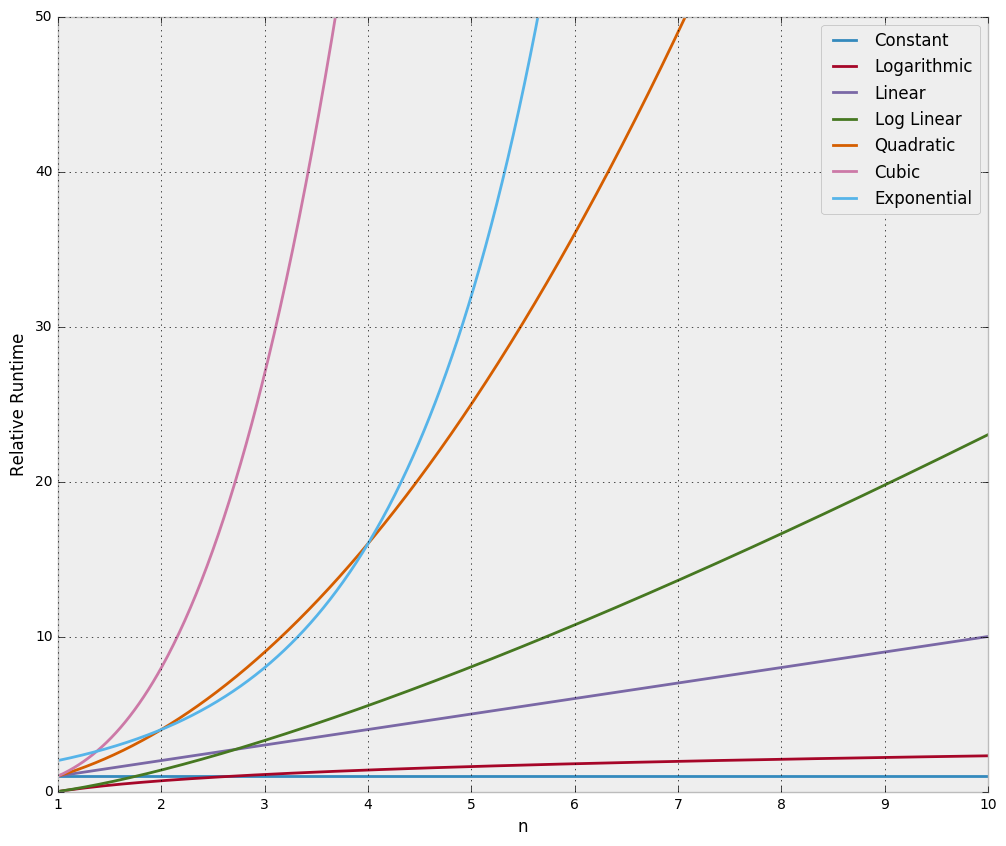

In [3]:
from math import log
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Set up runtime comparisons
n = np.linspace(1,10,1000)
labels = ['Constant','Logarithmic','Linear','Log Linear','Quadratic','Cubic','Exponential']
big_o = [np.ones(n.shape),np.log(n),n,n*np.log(n),n**2,n**3,2**n]

# Plot setup
plt.figure(figsize=(12,10))
plt.ylim(0,50)

for i in range(len(big_o)):
    plt.plot(n,big_o[i],label = labels[i])


plt.legend(loc=0)
plt.ylabel('Relative Runtime')
plt.xlabel('n')

In [7]:
#Dynamic Array
import sys
data = []
for i in range(10):
    a = len(data)
    b = sys.getsizeof(data)
    print ('Length: {0:2d}; Size in bytes: {1:2d}'.format(a,b))
    data.append(10)

Length:  0; Size in bytes: 64
Length:  1; Size in bytes: 96
Length:  2; Size in bytes: 96
Length:  3; Size in bytes: 96
Length:  4; Size in bytes: 96
Length:  5; Size in bytes: 128
Length:  6; Size in bytes: 128
Length:  7; Size in bytes: 128
Length:  8; Size in bytes: 128
Length:  9; Size in bytes: 192


**Python graps more space than required to hold the array**

### Dynamic Array Implementation

In [8]:
import ctypes

class DynamicArray(object):
    def __init__(self):
        self.n = 0 # count of elements in the array
        self.capacity = 1 # size of the array
        self.A = self.make_array(self.capacity) # make the raw array
        
    def __len__(self):
        return self.n
    
    def __getitem__(self, k):
        if not 0<=k<self.n:
            return IndexError('K is out of bound')
        return self.A[k]
    
    def append(self, element):
        if self.n == self.capacity:
            self._resize(2*self.capacity) #doubling if equal to capacity 
        self.A[self.n] = element
        self.n +=1
    
    def _resize(self, new_capacity):
        B = self.make_array(new_capacity)
        for k in range(self.n):
            B[k] = self.A[k]
        
        self.A = B
        self.capacity = new_capacity
        
    def make_array(self, new_capacity):
        return (new_capacity * ctypes.py_object)()

In [11]:
# Instantiate
arr = DynamicArray()

In [12]:
# Append new element
arr.append(1)

In [13]:
# Check length
len(arr)

1

In [14]:
# Append new element
arr.append(2)
# Check length
len(arr)

2

In [15]:
# Index
arr[0]

1

### Amortization